In [28]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# load data set
data = pd.read_csv("heart.csv")

#check if data set is loaded successfully
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [30]:
# check what we are working with
# inspect how big our data set is
size_of_dataset = data.shape
print(size_of_dataset)

(303, 14)


In [31]:
# inspect data types
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [32]:
# Data cleaning and pre-processing
# 1. check for missing values / empty cells
empty_cells = data.isnull().sum()
print(empty_cells)



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# 2. Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

1


In [34]:
# know which exact row has this dupicate
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

# get the duplicated rows index
print(duplicated_rows.index)



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  
Index([163, 164], dtype='int64')


In [35]:
# Eliminate the duplicate
eliminate_duplicates = data.drop_duplicates(keep="first", inplace=True)

print(eliminate_duplicates)

#check for duplicates again
new_duplicate_status = data.duplicated().sum()
print(f"Number of duplicates:{new_duplicate_status}")



None
Number of duplicates:0


In [36]:
# 3. check for wrong data format (different data types) e.g 1/7/2024, 172024 or 1.4, 1.45, 1.5, 155
# columns with wrong data types will always have an object data type except for strings because their correct data type is object.

# check for data types
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [37]:
# 4. check for wrong data (outliers) using the z-score, z = (x - mean)/ standard deviation

def detect_outliers(df):
    outliers_dict = {}
    threshold = 4  # Define the z-score threshold for identifying outliers

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate the mean and standard deviation of the column
            mean = np.mean(df[column])
            std = np.std(df[column])
            
            # Initialize a list to hold the outliers for the current column
            outliers = []

            # Iterate through each value in the column
            for value in df[column]:
                # Calculate the z-score for the value
                z_score = (value - mean) / std
                
                # Check if the z-score is greater than the threshold
                if np.abs(z_score) > threshold:
                    outliers.append(value)
            
            # Add the outliers to the dictionary with the column name as the key
            outliers_dict[column] = outliers
    
    return outliers_dict

# Call the function and print the result
outliers = detect_outliers(data)
print(outliers)


{'age': [], 'sex': [], 'cp': [], 'trestbps': [], 'chol': [564], 'fbs': [], 'restecg': [], 'thalach': [], 'exang': [], 'oldpeak': [6.2], 'slope': [], 'ca': [], 'thal': [], 'target': []}


In [38]:
# handle outliers
median_chol = data['chol'].median()
data.loc[data['chol'] > 450, 'chol'] = median_chol
print(outliers)

{'age': [], 'sex': [], 'cp': [], 'trestbps': [], 'chol': [564], 'fbs': [], 'restecg': [], 'thalach': [], 'exang': [], 'oldpeak': [6.2], 'slope': [], 'ca': [], 'thal': [], 'target': []}


C:\Users\DELL\AppData\Local\Temp\ipykernel_20388\2195014302.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '240.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['chol'] > 450, 'chol'] = median_chol


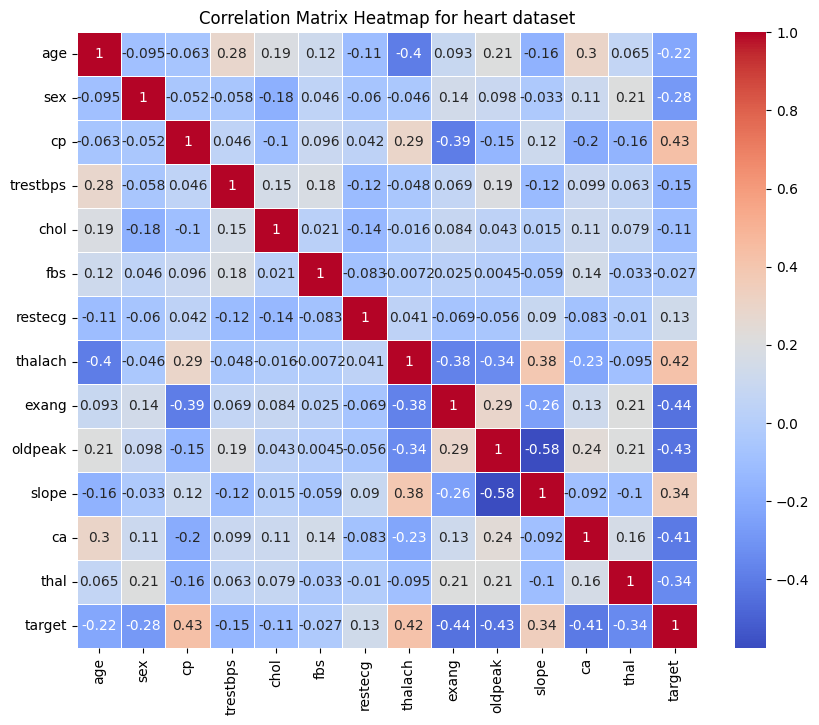

In [39]:
# Data visualisation
#Corelation
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for heart dataset')
plt.show()


In [40]:
# know the number of males and females
# Count the number of males and females
sex_counts = data['sex'].value_counts()

# Display the counts
print(sex_counts)
print("Number of males:", sex_counts[1])
print("Number of females:", sex_counts[0])

#make conclusions
if sex_counts[1] > sex_counts[0]:
    print("There are more males than females")
elif sex_counts[1] < sex_counts[0]:
    print("There are more females than males")
else:
    print("The number of males is equal to the number of females")

sex
1    206
0     96
Name: count, dtype: int64
Number of males: 206
Number of females: 96
There are more males than females


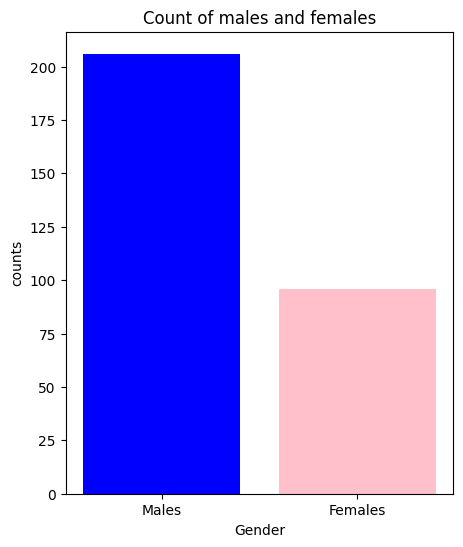

In [41]:
# visualize the gender distribution using a bar graph
# Calculate the average age for each gender
average_age_by_gender = data.groupby('sex')['age'].mean()

# Create the bar graph
plt.figure(figsize=(5, 6))
plt.bar(['Males', 'Females'], sex_counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('counts')
plt.title('Count of males and females')
plt.show()


In [42]:
# FEATURE ENGINEERING IN PYTHON
#1. Create age groups to simplify the analysis

age_boundaries = [0, 30, 45, 60, float("inf")]
age_group = ["young", "middle-aged", "senior", "elderly"]

#create a new column for age group in our dataset
data["age_group"] = pd.cut(data["age"], bins=age_boundaries, labels=age_group, right=False)

# check if new column is added
print(data.head())



   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3       145  233.0    1        0      150      0      2.3   
1   37    1   2       130  250.0    0        1      187      0      3.5   
2   41    0   1       130  204.0    0        0      172      0      1.4   
3   56    1   1       120  236.0    0        1      178      0      0.8   
4   57    0   0       120  354.0    0        1      163      1      0.6   

   slope  ca  thal  target    age_group  
0      0   0     1       1      elderly  
1      0   0     2       1  middle-aged  
2      2   0     2       1  middle-aged  
3      2   0     2       1       senior  
4      2   0     2       1       senior  


In [43]:
# Distribution of heart diseases across age groups

age_group_counts = data.groupby('age_group')['target'].value_counts(normalize=True).unstack().fillna(0) #get proportion of people with diseases for each age group

#make our target to be only the people with diseases
age_group_counts['target'] = age_group_counts[1]

# summary of how it looks like
print(age_group_counts)

# reset the age_group column back into a column and not be an index
age_group_counts = age_group_counts[['target']].reset_index()


target              0         1    target
age_group                                
young        0.000000  1.000000  1.000000
middle-aged  0.259259  0.740741  0.740741
senior       0.458599  0.541401  0.541401
elderly      0.577778  0.422222  0.422222


C:\Users\DELL\AppData\Local\Temp\ipykernel_20388\207490976.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby('age_group')['target'].value_counts(normalize=True).unstack().fillna(0) #get proportion of people with diseases for each age group


C:\Users\DELL\AppData\Local\Temp\ipykernel_20388\857000192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_counts, x='age_group', y='target', palette='viridis')


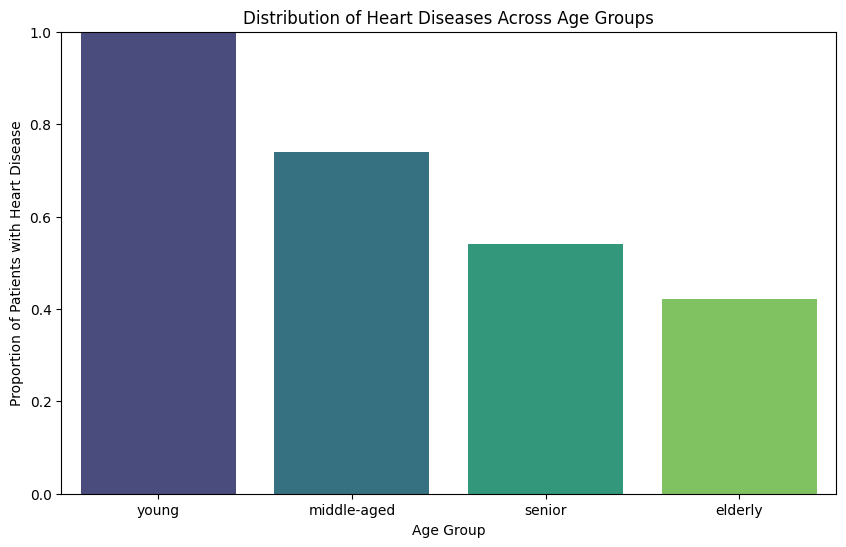

In [44]:
# Visualize the distribution above.
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_counts, x='age_group', y='target', palette='viridis')
plt.title('Distribution of Heart Diseases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Patients with Heart Disease')
plt.ylim(0, 1)
plt.show()


In [45]:
# FEATURE SCALING
# Feature scaling is a technique that is used to standardize, (make data have a similar specific range) the range of 
# independed features / columns of data.
# It is crucial for preparing data for machine learning prediction algorithms.
# The goal is to ensure that all features have a similar scale, typically in a range of 0 to 1 or with a mean of 0 and a 
# standard deviation of 1.
# There are two types/techiniques/methods of feature scaling
#    1. Min-max scaling (Normalization) - Scales data to a fixed range, usually [0, 1] or [-1, 1]. Use when 
#    the algorithm requires data in a bounded interval
#    2.Standardization (Z-score Normalization): Centers the data around 0 with a standard deviation of 1. use when 
#    algorithms assume normally distributed data,  dataset contains features with different ranges

# since our data has features/columns with different ranges, and the algorithms we are going to use donot require bounded data, we are going to use the 
# standardization or z-score normalization to scale our data.  

In [46]:
# APPLYING STANDARDIZATION TO OUR DATARFAME

# import the libraries we are going to use.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify which features are numerical and which are categorical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


#provide a transformer to transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
# Apply transformations to the dataset
df_preprocessed = preprocessor.fit_transform(data)


# Convert the transformed data back to a DataFrame (optional)
df_transformed = pd.DataFrame(df_preprocessed, columns=numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
df_transformed["target"] = data["target"]

# see our standardized dataframe
print(df_transformed.head())





        age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  \
0  0.949794  0.764066 -0.257224  0.018826  1.084022    0.0    1.0   0.0   0.0   
1 -1.928548 -0.091401  0.094604  1.636979  2.118926    0.0    1.0   0.0   0.0   
2 -1.485726 -0.091401 -0.857401  0.980971  0.307844    1.0    0.0   0.0   1.0   
3  0.174856 -0.661712 -0.195136  1.243374 -0.209608    0.0    1.0   0.0   1.0   
4  0.285561 -0.661712  2.246964  0.587366 -0.382092    1.0    0.0   1.0   0.0   

   cp_2  ...  ca_4  thal_0  thal_1  thal_2  thal_3  age_group_elderly  \
0   0.0  ...   0.0     0.0     1.0     0.0     0.0                1.0   
1   1.0  ...   0.0     0.0     0.0     1.0     0.0                0.0   
2   0.0  ...   0.0     0.0     0.0     1.0     0.0                0.0   
3   0.0  ...   0.0     0.0     0.0     1.0     0.0                0.0   
4   0.0  ...   0.0     0.0     0.0     1.0     0.0                0.0   

   age_group_middle-aged  age_group_senior  age_group_young  target  
0   

In [49]:
# DATA SPLITTING
# Data splitting is the process of dividing a dataset into two separate subsets, a training set and a testing (or validtion) set.
# usually divided in a ratio of 3:7, where 30% is testing data and 70% is training data.
# we first group our features in to independent variables (x)(all features except target feature)
# and then the dependent variable (y)(our target feature that our model aims to predict based on the features (X).)
# Data from both the dependant variables and independent variable is randomly split into training and testing sets basing on a given ratio.

from sklearn.model_selection import train_test_split

# Using the df_transformed dataframe as it is our preprocessed DataFrame after standardization and encoding
X = df_transformed.drop('target', axis=1)  # Features (all columns except 'target')
y = df_transformed['target']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data")
print(X_train)
print(y_train)
print("Testing data")
print(X_test)
print(y_test)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)


Training data
          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
124 -1.707137 -2.144521 -0.960880  1.287108 -0.899544    1.0    0.0   0.0   
72  -2.814192 -0.091401 -0.857401  2.292987 -0.899544    0.0    1.0   0.0   
15  -0.489377 -0.661712 -0.546965  0.368697  0.480328    1.0    0.0   0.0   
10  -0.046555  0.478910 -0.133049  0.456164  0.135360    0.0    1.0   1.0   
163 -1.817842  0.364848 -1.457578  1.024705 -0.899544    0.0    1.0   0.0   
..        ...       ...       ...       ...       ...    ...    ...   ...   
188 -1.485726 -1.232023 -1.519666  0.368697 -0.899544    0.0    1.0   1.0   
71  -0.378671 -2.144521 -0.381398  0.193761 -0.899544    0.0    1.0   0.0   
106  1.614027  1.619532 -0.236528 -0.812118 -0.813302    0.0    1.0   0.0   
270  0.728383  0.136724 -0.236528 -0.199843  1.342748    0.0    1.0   0.0   
102  0.949794  0.478910 -1.043663  1.287108 -0.899544    1.0    0.0   0.0   

     cp_1  cp_2  ...  ca_3  ca_4  thal_0  thal_1  thal_2  tha

In [54]:
# SUPERVISED LEARNING PREDICTION MODELS
# 1. Regression
#   i) Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Create the model
model = LinearRegression()

# Train the regression model
model.fit(X_train, y_train)

# was giving me a value error, that input has missing values

## Check for missing values in X_test and y_test
print("Missing values in X_test:")
print(X_test.isnull().sum())

print("\nMissing values in y_test:")
print(y_test.isnull().sum())

# fill missing values in the y_test
y_test = y_test.fillna(y_test.mean())

#check for missing values again
print(y_test.isnull().sum())


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Print some predictions vs actual values
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)


Missing values in X_test:
age                      0
trestbps                 0
chol                     0
thalach                  0
oldpeak                  0
sex_0                    0
sex_1                    0
cp_0                     0
cp_1                     0
cp_2                     0
cp_3                     0
fbs_0                    0
fbs_1                    0
restecg_0                0
restecg_1                0
restecg_2                0
exang_0                  0
exang_1                  0
slope_0                  0
slope_1                  0
slope_2                  0
ca_0                     0
ca_1                     0
ca_2                     0
ca_3                     0
ca_4                     0
thal_0                   0
thal_1                   0
thal_2                   0
thal_3                   0
age_group_elderly        0
age_group_middle-aged    0
age_group_senior         0
age_group_young          0
dtype: int64

Missing values in y_test:
0
0
Mean Squared

In [69]:
# Analyze and predict which age group is more likely to suffer from heart diseases

# check if the age_group columns are in our x_test array
# print(X_test.columns)

# Add the predictions to the X_test dataframe for analysis
X_test['predicted_target'] = y_pred

# Calculate the average predicted probability of heart disease for each age group
age_group_columns = ['age_group_elderly', 'age_group_middle-aged', 'age_group_senior', 'age_group_young']

# Initialize an empty dictionary to store the results
age_group_analysis = {}

# Loop through each age group column to calculate the average predicted probability
for column in age_group_columns:
    # Calculate the mean of predicted_target for the current age group column
    average_probability = X_test.loc[X_test[column] == 1, 'predicted_target'].mean()
    # Store the result in the dictionary
    age_group_analysis[column] = average_probability

# Convert the dictionary to a DataFrame for better visualization
age_group_analysis_df = pd.DataFrame.from_dict(age_group_analysis, orient='index', columns=['average_predicted_target'])
age_group_analysis_df = age_group_analysis_df.sort_values(by='average_predicted_target', ascending=False)

print(age_group_analysis_df)

#make conclusion
# Find the age group with the highest average probability
most_likely_age_group = age_group_analysis_df.loc[age_group_analysis_df['average_predicted_target'].idxmax()]

print(" The most likely group to suffer from heart diseases is;")
print(most_likely_age_group)

# Remove the predicted_target column after analysis
X_test = X_test.drop(columns=['predicted_target'], errors='ignore')



                       average_predicted_target
age_group_middle-aged                  0.618059
age_group_senior                       0.471362
age_group_elderly                      0.369435
age_group_young                             NaN
 The most likely group to suffer from heart diseases is;
average_predicted_target    0.618059
Name: age_group_middle-aged, dtype: float64


In [71]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (target = 1)
y_pred = knn_model.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# do the predictions




